In [ ]:
#assignment 4

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
color_img = cv2.imread("/content/image.jpg")
gray_img = cv2.imread("/content/image_2.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
gray_from_color = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

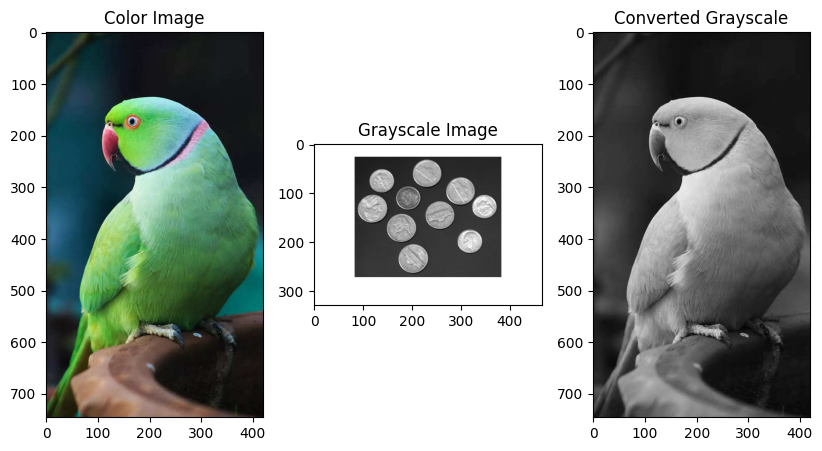

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)), plt.title("Color Image")
plt.subplot(1, 3, 2), plt.imshow(gray_img, cmap='gray'), plt.title("Grayscale Image")
plt.subplot(1, 3, 3), plt.imshow(gray_from_color, cmap='gray'), plt.title("Converted Grayscale")
plt.show()

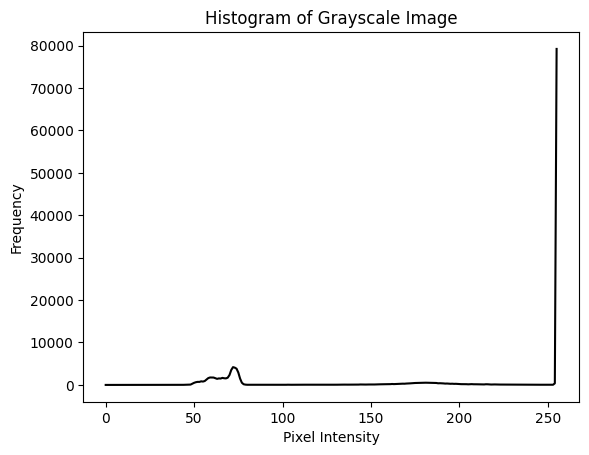

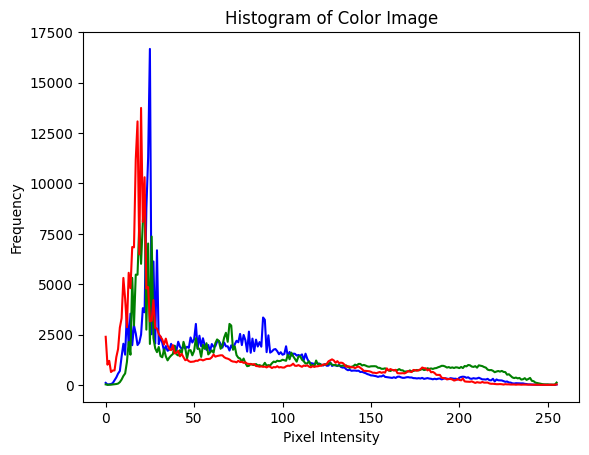

In [ ]:
def plot_histogram(image, title, color=('b', 'g', 'r')):
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    else:  # Color image (BGR Channels)
        for i, col in enumerate(color):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Histograms
plot_histogram(gray_img, "Histogram of Grayscale Image")
plot_histogram(color_img, "Histogram of Color Image")

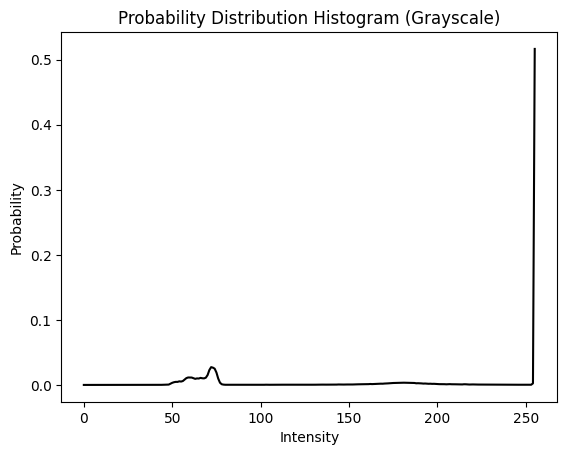

In [ ]:
gray_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
gray_hist_prob = gray_hist / gray_hist.sum()  # Normalize
plt.plot(gray_hist_prob, color='black')
plt.title("Probability Distribution Histogram (Grayscale)")
plt.xlabel("Intensity")
plt.ylabel("Probability")
plt.show()

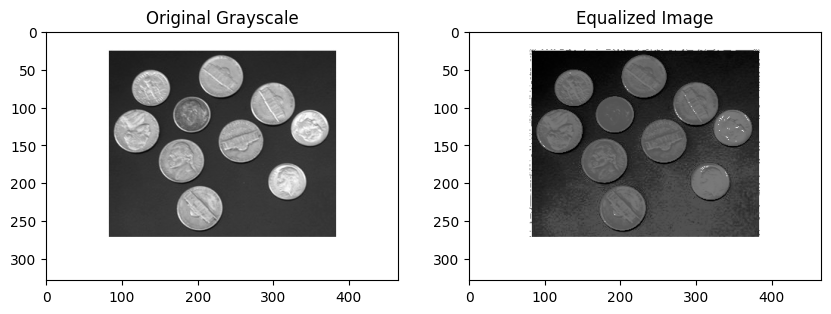

In [ ]:
equalized_gray = cv2.equalizeHist(gray_img)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(gray_img, cmap='gray'), plt.title("Original Grayscale")
plt.subplot(1, 2, 2), plt.imshow(equalized_gray, cmap='gray'), plt.title("Equalized Image")
plt.show()

In [ ]:
channels = cv2.split(color_img)
eq_channels = [cv2.equalizeHist(ch) for ch in channels]
equalized_color = cv2.merge(eq_channels)

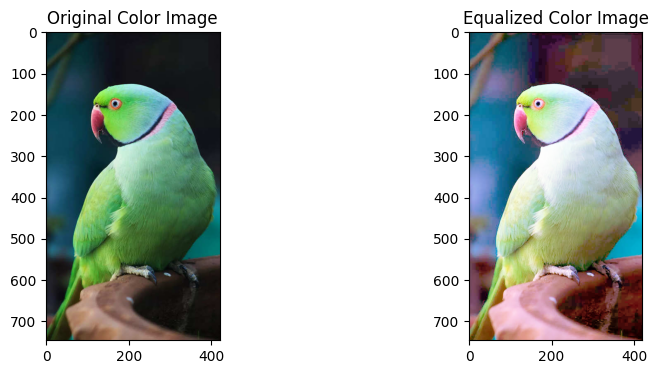

In [ ]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)), plt.title("Original Color Image")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(equalized_color, cv2.COLOR_BGR2RGB)), plt.title("Equalized Color Image")
plt.show()

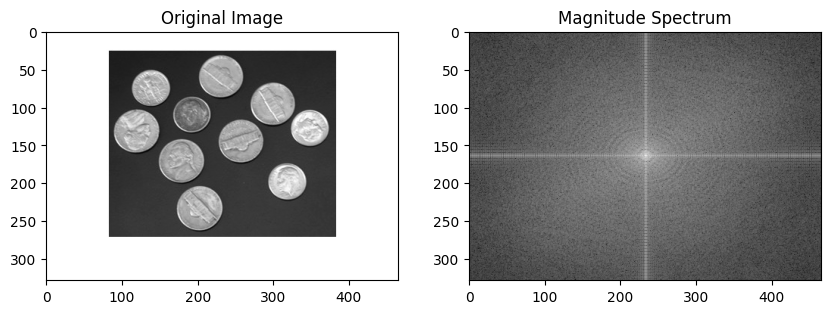

In [ ]:
def fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

# Apply FFT
dft, dft_shift, mag_spectrum = fourier_transform(gray_img)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(gray_img, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(mag_spectrum, cmap='gray'), plt.title("Magnitude Spectrum")
plt.show()


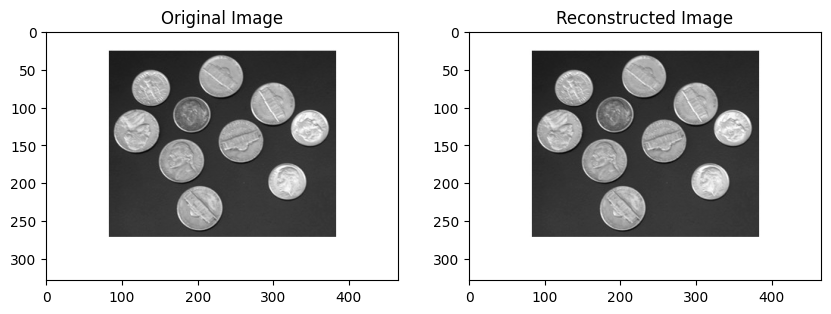

In [ ]:
def inverse_fourier_transform(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    return np.abs(img_reconstructed)

reconstructed_image = inverse_fourier_transform(dft_shift)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(gray_img, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(reconstructed_image, cmap='gray'), plt.title("Reconstructed Image")
plt.show()


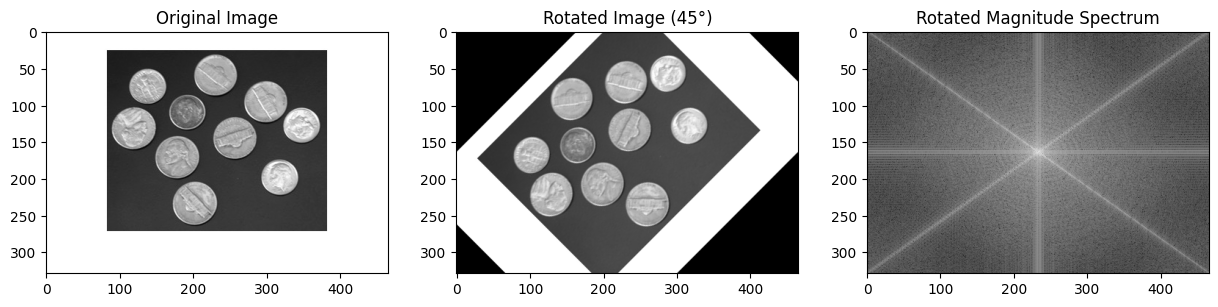

In [ ]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(image, M, (w, h))

rotated_img = rotate_image(gray_img, 45)
_, rotated_dft_shift, rotated_mag_spectrum = fourier_transform(rotated_img)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(gray_img, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(rotated_img, cmap='gray'), plt.title("Rotated Image (45°)")
plt.subplot(1, 3, 3), plt.imshow(rotated_mag_spectrum, cmap='gray'), plt.title("Rotated Magnitude Spectrum")
plt.show()